In [1]:
import numpy as np

In [2]:
from pathlib import Path

In [3]:
import matplotlib.pyplot as plt

In [4]:
from keras.preprocessing import image

C:\Users\LENOVO\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
p=Path("Images")


In [6]:
dirs=p.glob("*")
image_data=[]
labels=[]
labels_dict={'cat':0,'dog':1,'horse':2,'human':3}
for folder in dirs:
    label=str(folder).split("\\")[-1][:-1]
    #print(label)
    for img_path in folder.glob("*.jpg"):
        img=image.load_img(img_path,target_size=(32,32))
        img_arr=image.img_to_array(img)
        image_data.append(img_arr)
        labels.append(labels_dict[label])

In [7]:
image_data=np.array(image_data,dtype='float32')/255.0
labels=np.array(labels)

In [8]:
import matplotlib.pyplot as plt

In [9]:
def drawimg(image):
    plt.imshow(image)
    plt.axis("off")
    plt.show()
    return

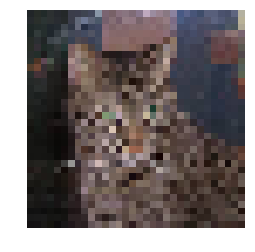

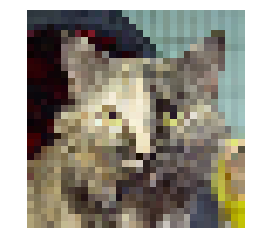

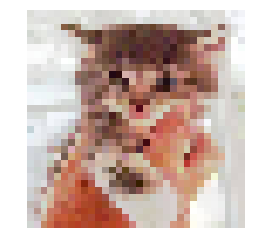

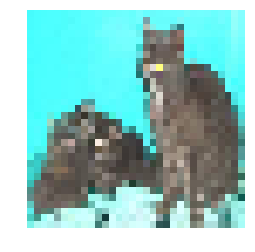

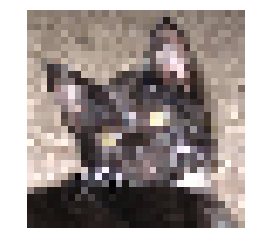

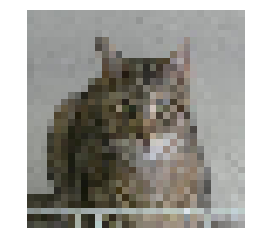

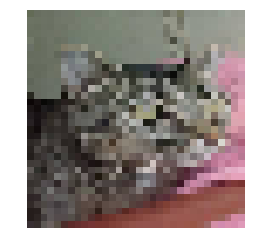

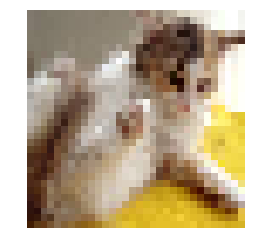

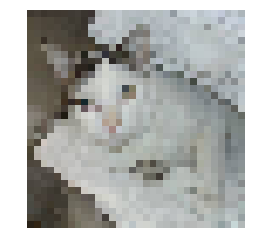

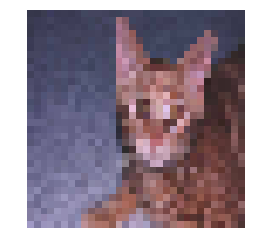

In [10]:
for i in range(10):
    drawimg(image_data[i])

In [11]:
M = image_data.shape[0] 
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


In [31]:
class SVM():
    def __init__(self,C=1):
        self.b=0
        self.w=0
        self.c=C
        
    def getloss(self,w,Y,X,b):
        loss=0
        m=X.shape[0]
        loss+=0.5*np.dot(w,(w.T))
        for i in range(m):
            ti=Y[i]*(np.dot(w,X[i].T) +b)
            loss+=self.c * max(0,1-ti)
        return loss[0][0]
    def fit(self,X,Y,max_itr=100,learning_rate=0.001,batch_size=50):
        c=self.c
        n=X.shape[1]
        w=np.zeros((1,n))
        b=0
        losses=[]
        m=X.shape[0]
        for k in range(max_itr):
            losses.append(self.getloss(w,Y,X,b))
            ids=np.arange(m)
            np.random.shuffle(ids)
            for batch_start in range(0,m,batch_size):
                grad_b=0
                grad_w=0
                for j in range(batch_start,batch_size+batch_start): 
                    
                    if(j<X.shape[0]):
                        i=ids[j]
                        ti=Y[i]*(np.dot(w ,X[i].T)+b)
                        if(ti>=1):
                            grad_b+=0
                            grad_w+=0
                        if(ti<1):
                            grad_b+=learning_rate*c*Y[i]
                            grad_w+=learning_rate*c*Y[i]*X[i]
                
                w=w-learning_rate*w+grad_w
                b=b+grad_b
        self.w=w
        self.b=b
        return w[0],b,losses   
            
            
            

In [32]:
classes=len(labels_dict)

In [33]:
print(classes)

4


In [34]:
d={}
for i in range(classes):
    d[i]=[]
    

In [35]:
for i in range(len(labels)):
    d[labels[i]].append(np.array(image_data[i]))

In [36]:
import random
for i in d.keys():
    d[i]=np.array(d[i])
    random.shuffle(d[i])
    


In [37]:
#training

In [38]:
def getpair(d1,d2):
    row1=d1.shape[0]
    row2=d2.shape[0]
    row=row1+row2
    X=np.zeros((row,d1.shape[1]))
    X[:row1,:]=d1
    X[row1:,:]=d2
    Y=np.zeros((row,))
    Y[:row1]=-1
    Y[row1:]=+1
    return X,Y

In [47]:
mySVM=SVM()
X,Y=getpair(d[0],d[1])
w,b,loss=mySVM.fit(X,Y,learning_rate=0.00001,max_itr=1000)
print(w)


[0.03239895 0.03339813 0.02030403 ... 0.00215258 0.00282446 0.00271159]


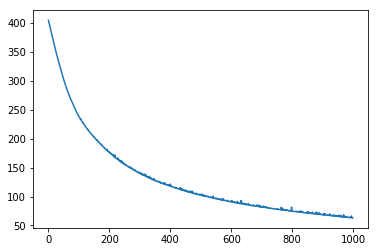

In [48]:
plt.plot(loss)

In [58]:
def trainSVM(d):
    coeff={}
    for i in range(classes):
        coeff[i]={}
        for j in range(i+1,classes):
            x,y=getpair(d[i],d[j])
            w,b,loss=mySVM.fit(x,y,learning_rate=0.00001,max_itr=1000)
            plt.plot(loss)
            plt.show()
            coeff[i][j]=(w,b)            
    return coeff        

In [59]:
def prediction(w,x,b):
    val=np.dot(x,w.T)+b
    if(val>=0):
        return 1
    else:
        return -1

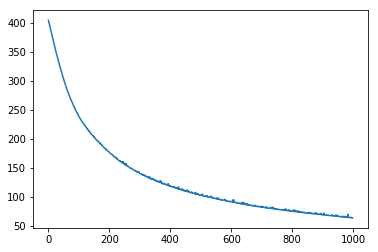

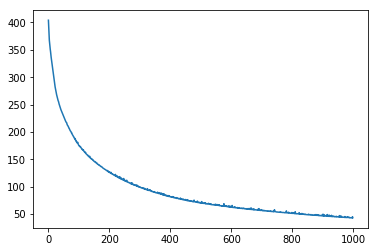

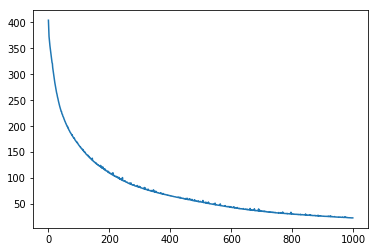

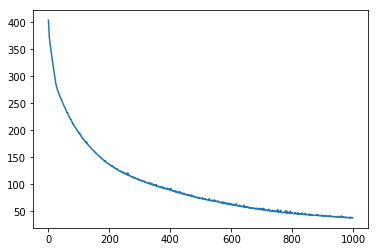

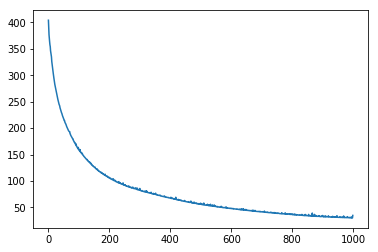

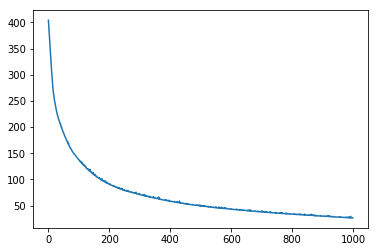

In [60]:
svm_classifier=trainSVM(d)

In [61]:
def predict(x):
    count=np.zeros((classes,))
    for i in range(classes):
        for j in range(i+1,classes):
            w=svm_classifier[i][j][0]
            b=svm_classifier[i][j][1]
            if(prediction(w,x,b)==-1):
                count[i]+=1
            else:
                count[j]+=1
    pred=np.argmax(count)
    return pred
            
    

In [62]:
def accuracy(x,y):
    count=0
    for i in range(x.shape[0]):
        if(predict(x[i])==y[i]):
            count+=1
    return (count/x.shape[0])    
    

In [63]:
print(accuracy(image_data,labels))

0.6757425742574258


In [64]:
from sklearn import svm

In [65]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)


In [66]:
svm_classifier.fit(image_data,labels)
svm_classifier.score(image_data,labels)

1.0